In [11]:
import pandas as pd
df = pd.read_csv('traffic_accidents.csv')
df.head(10)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
5,09/06/2023 12:59:00 AM,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,2.0,0.0,0.0,2.0,0.0,0.0,0,4,9
6,12/20/2022 11:45:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11,3,12
7,09/20/2023 02:38:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"CURVE, LEVEL",DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,14,4,9
8,06/04/2018 06:42:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,18,2,6
9,09/07/2023 05:30:00 PM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,17,5,9


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('traffic_accidents.csv')

# Display basic information
print("Dataset Info:\n")
print(df.info())
print("\nFirst 5 rows:\n")
print(df.head())

# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributo

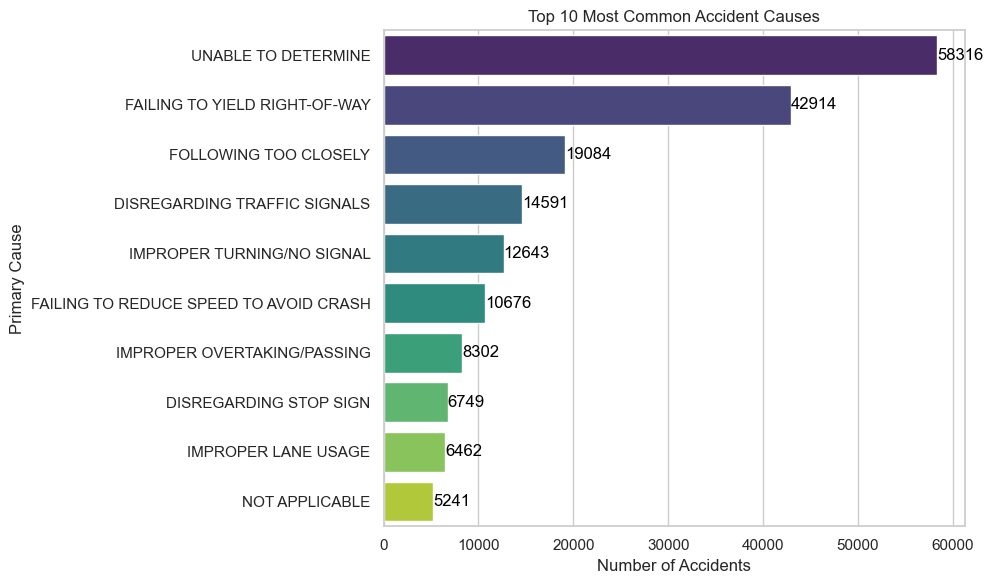

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Objective 1: Most Common Accident Cause
# ------------------------------
cause_counts = df['prim_contributory_cause'].value_counts().head(10)
sns.barplot(x=cause_counts.values, y=cause_counts.index, hue=cause_counts.index, dodge=False, palette='viridis', legend=False)

plt.title('Top 10 Most Common Accident Causes')
plt.xlabel('Number of Accidents')
plt.ylabel('Primary Cause')
for i, v in enumerate(cause_counts.values):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

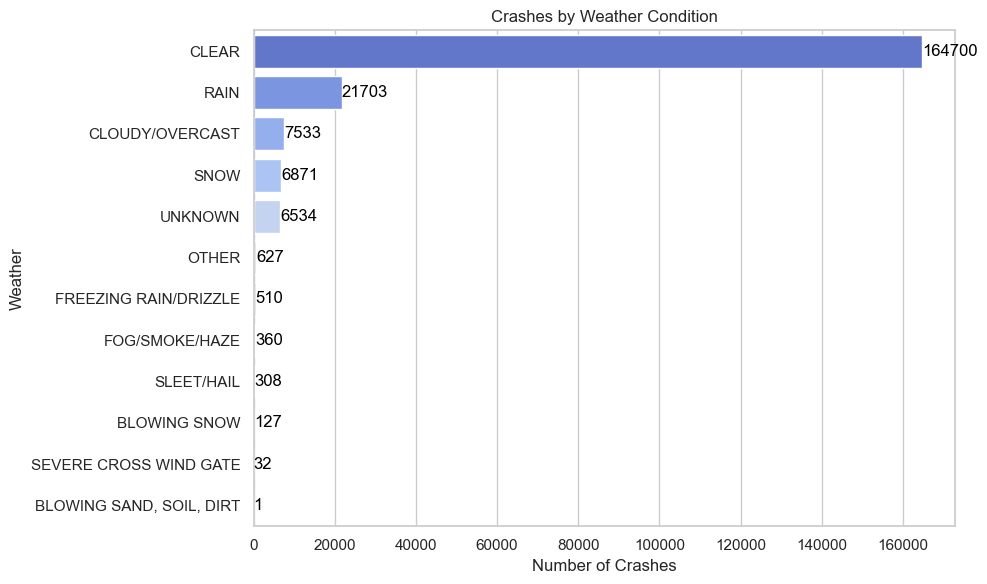

In [4]:
# Objective 2: Crashes in Different Weather
# ------------------------------
weather_crashes = df['weather_condition'].value_counts()
sns.barplot(x=weather_crashes.values, y=weather_crashes.index, hue=weather_crashes.index, dodge=False, palette='coolwarm', legend=False)

plt.title('Crashes by Weather Condition')
plt.xlabel('Number of Crashes')
plt.ylabel('Weather')
for i, v in enumerate(weather_crashes.values):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

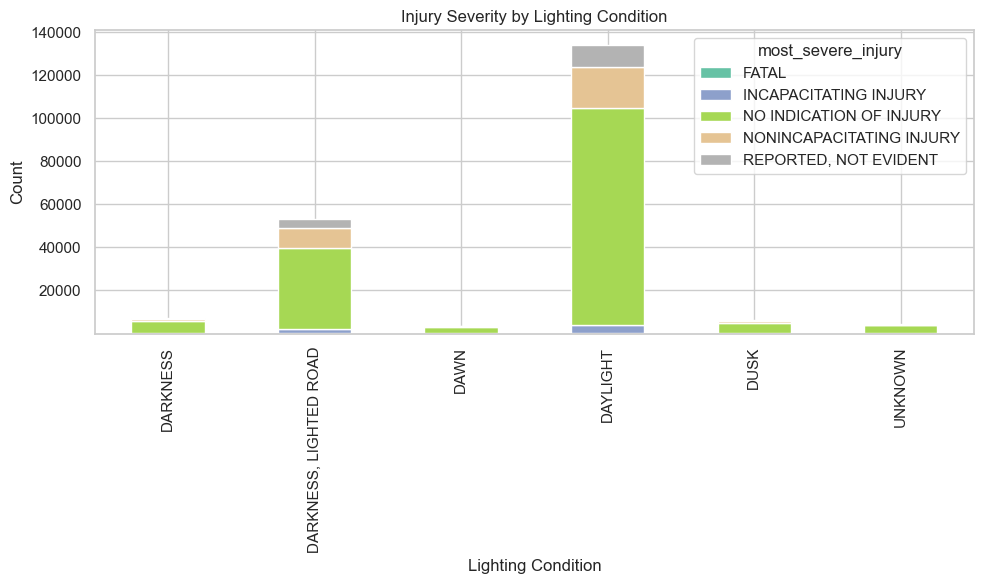

In [6]:
# Objective 3: Injuries by Lighting Condition
# ------------------------------
injury_lighting = df.groupby('lighting_condition')['most_severe_injury'].value_counts().unstack().fillna(0)
injury_lighting.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Injury Severity by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

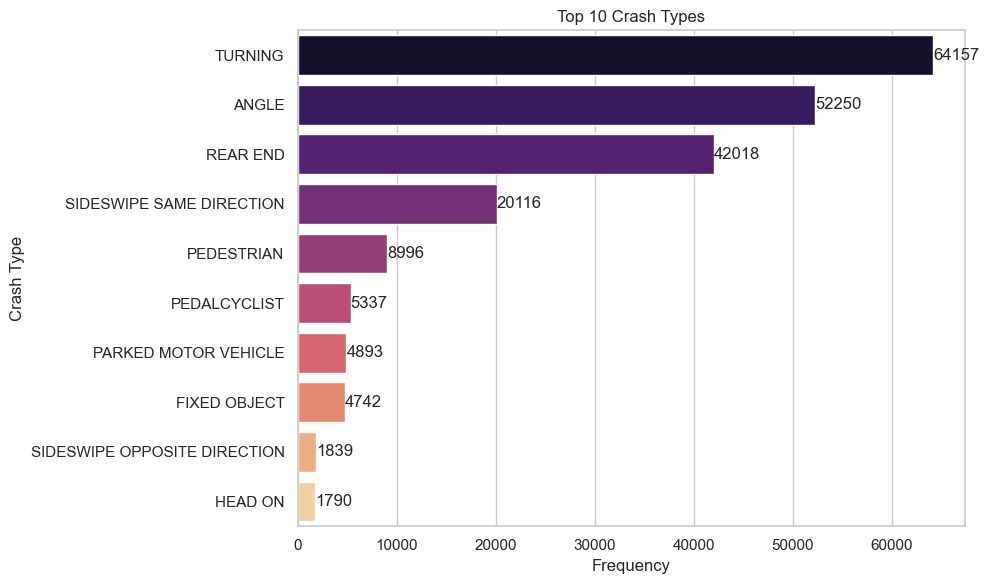

In [8]:
# Objective 4: Crash Type Frequency (Top 10 crash types)
crash_type_counts = df['first_crash_type'].value_counts().head(10)

sns.barplot(
    x=crash_type_counts.values,
    y=crash_type_counts.index,
    hue=crash_type_counts.index,
    dodge=False,
    palette='magma',
    legend=False
)
plt.title('Top 10 Crash Types')
plt.xlabel('Frequency')
plt.ylabel('Crash Type')

# Add value labels
for i, v in enumerate(crash_type_counts.values):
    plt.text(v + 10, i, str(v), va='center')

plt.tight_layout()
plt.show()

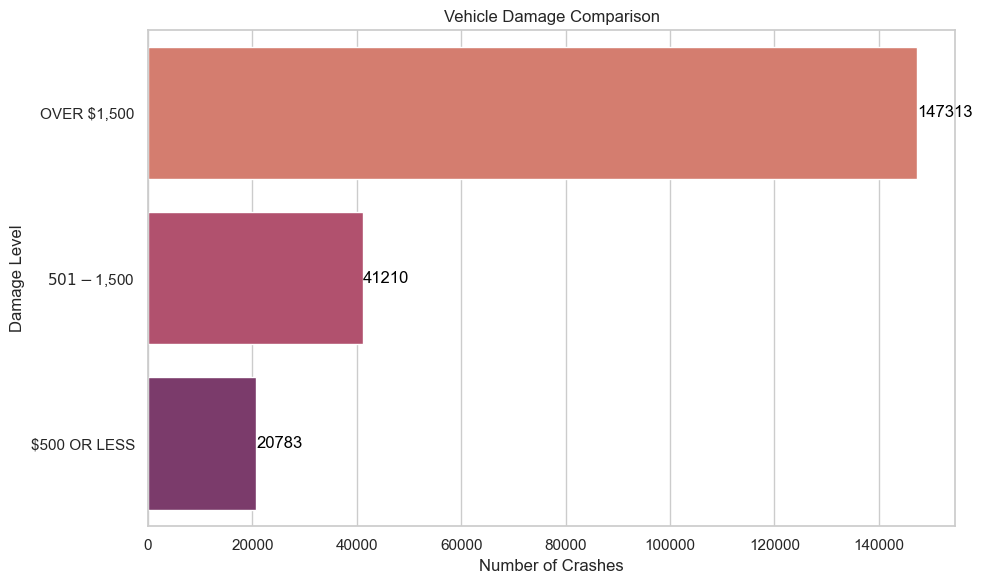

In [15]:
# Objective 5: Damage Comparison
# ------------------------------
damage_counts = df['damage'].value_counts()
sns.barplot(x=damage_counts.values, y=damage_counts.index, hue=damage_counts.index, palette='flare', dodge=False, legend=False)

plt.title('Vehicle Damage Comparison')
plt.xlabel('Number of Crashes')
plt.ylabel('Damage Level')

for i, v in enumerate(damage_counts.values):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

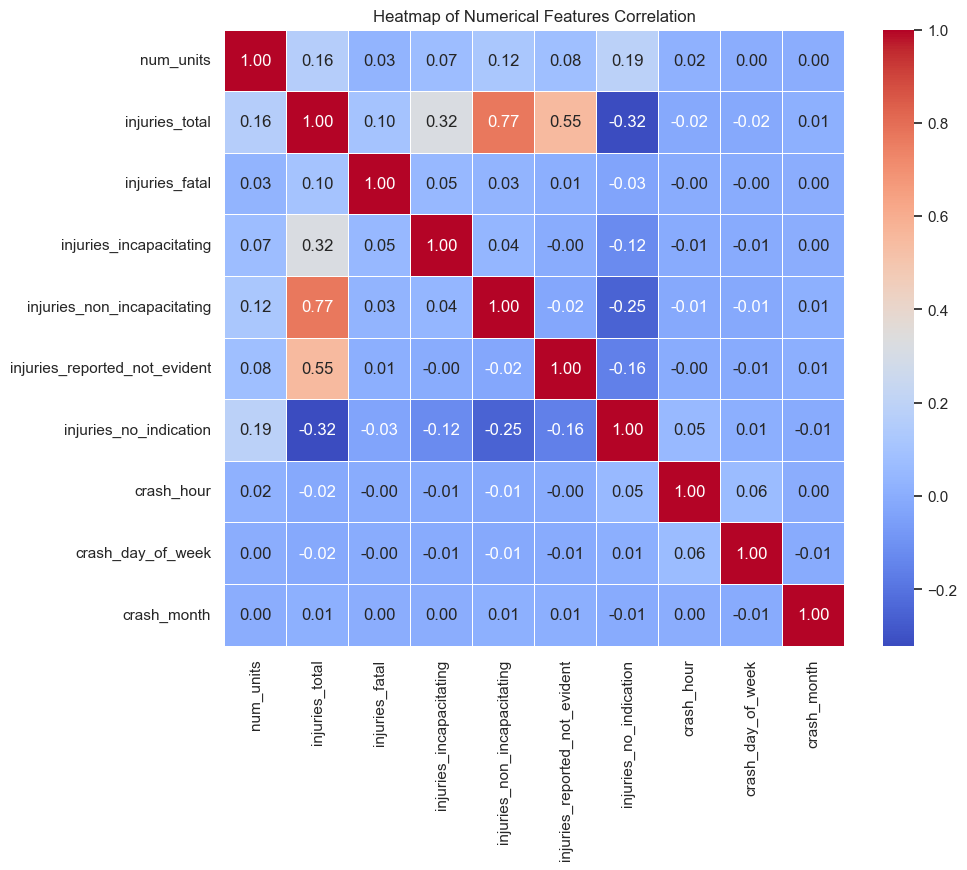

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the figure size and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Features Correlation")
plt.show()